<a href="https://colab.research.google.com/github/s-ryanlee/MichiganPythonDec2020/blob/main/AmazonBooksExampleNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Read file into program

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/s-ryanlee/MiPyExample/main/bestsellers%20with%20categories.csv')
df.rename(columns={'User Rating': 'User_Rating'}, inplace=True)
print(df)

                                                  Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                    11/22/63: A Novel  ...      Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                               1984 (Signet Classics)  ...      Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
..                                                 ...  ...          ...
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...      Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[550 rows x 7 columns]


Let's say we only want to look at non fiction best sellers

In [ ]:
nonfiction_bestsellers = df[(df.Genre == 'Non Fiction')]
print(nonfiction_bestsellers)

                                                  Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
8        A Higher Loyalty: Truth, Lies, and Leadership  ...  Non Fiction
11   A Patriot's History of the United States: From...  ...  Non Fiction
..                                                 ...  ...          ...
539  Women Food and God: An Unexpected Path to Almo...  ...  Non Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[310 rows x 7 columns]


#Data Exploration

Check variable correlations

             User_Rating   Reviews     Price      Year
User_Rating     1.000000  0.315612 -0.134869  0.228196
Reviews         0.315612  1.000000 -0.145563  0.414921
Price          -0.134869 -0.145563  1.000000 -0.165569
Year            0.228196  0.414921 -0.165569  1.000000


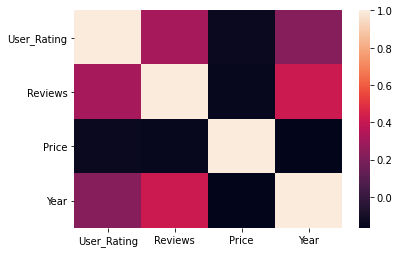

In [ ]:
corr_coe = nonfiction_bestsellers.corr()
print(corr_coe)
sns.heatmap(corr_coe)

Simple visualizations

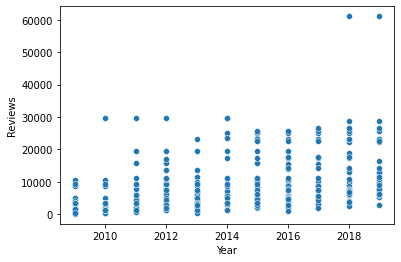

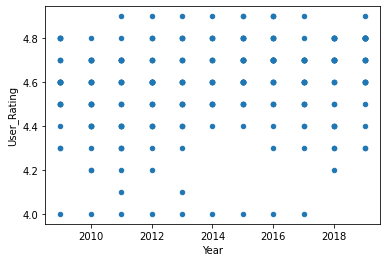

In [ ]:
#scatterplot using seaborn
sns.scatterplot(data=nonfiction_bestsellers, x='Year', y='Reviews')

#scatterplot using matplotlib
nonfiction_bestsellers.plot('Year', 'User_Rating', kind='scatter')

#Basic Linear Regression

Change pandas data frame series to a numpy array

In [ ]:
x1 = nonfiction_bestsellers[['Year']].to_numpy()
y1 = nonfiction_bestsellers['Reviews'].to_numpy()
#print(x1, y1)

Create Model and view correlation coefficient and intercept value

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x1, y1)
print(model.coef_, model.intercept_)

[1120.80267899] -2248296.52919001


Apply regression line to plot

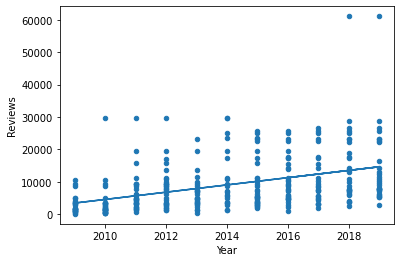

In [ ]:
nonfiction_bestsellers.plot('Year', 'Reviews', kind='scatter')
predict = model.predict(x1)
plt.plot(x1, model.predict(x1))
plt.show()

This is an brief overview of the way my team members plotted their regression during our analysis of Covid-19 data. Unfortunately, at the time, I had very limited experience with using Python for data analysis. They went a few steps further to find information on the accuracy of their models using sklearn.

I am still exploring some of the basics of this package and have yet to figure out how to analyze the regression model further than this.

Even so, I later learned of some statistics specific libraries that made performing regression analysis quite simple in Python, which can be seen below.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model2 = smf.ols("Reviews ~ Year", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     40.91
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           3.42e-10
Time:                        01:58:01   Log-Likelihood:                -5913.6
No. Observations:                 550   AIC:                         1.183e+04
Df Residuals:                     548   BIC:                         1.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.955e+06   3.08e+05     -6.357      0.000   -2.56e+06   -1.35e+06
Year         976.8404    152.729      6.396      0.000     676.835    1276.846
==============================================================================
Omnibus:                      318.766   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2455.038
Skew:                           2.506   Prob(JB):                         0.00
Kurtosis:                      12.055   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With two lines of code, we can output a nice display. 
Unfortunatley, with this package, must use quotes a bit more often because of literal strings. 
But, allows you to use R-style formulas in python and outputs R-like summary. 
For someone that learned most data analysis in R first, this package is much easier to use at the moment than sklearn. 

We can go a bit further in our analysis by analyzing the residuals

In [ ]:
model2.resid

0      3443.037455
1     -6970.760727
2      3118.356727
3      6540.197091
4     -9172.483636
          ...     
545   -7424.483636
546     424.037455
547    -552.802909
548   -1529.643273
549   -2506.483636
Length: 550, dtype: float64

And create a histogram of residuals

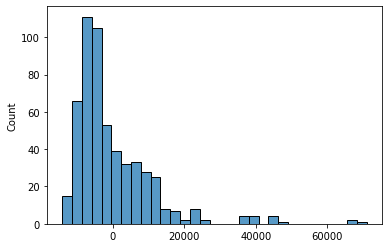

In [ ]:
sns.histplot(model2.resid)

We can also look at a scatterplot of residuals vs. year

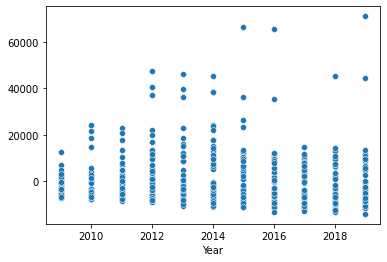

In [ ]:
sns.scatterplot(x=df['Year'],y=model2.resid)

pandas series of the values from the regression summary

In [ ]:
model2.params

Intercept   -1.955403e+06
Year         9.768404e+02
dtype: float64

Can also access items in this series using .loc

In [ ]:
model2.params.loc['Year']

976.8403636363579